# Departures Prediction

This generic problem was discovered on the Internet. I cannot remember the source, but it was at a point where I would search for any Machine Learning problems and attempt to solve. In this example, the objective was to predict whether individuals would depart from an organization based on various features. The final output will have the actual value and prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.

In [2]:
dataset=r'C:\Users\claudius.ibine\Desktop\departures.csv'
dataset=pd.read_csv(dataset,index_col=None)

Here is where I summarize the dataset.

In [3]:
def aggregrate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The first 10 records are:')
    print(dataset.head(5))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [4]:
aggregrate()

The number of rows by columns:  (14999, 10)

The first 10 records are:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  s

Here is where I clean the dataset.

In [8]:
def clean():
    print(dataset.isnull().sum()) #check nulll values
    print(dataset.describe()) #check for low values in min
    print(dataset.head(10))

In [9]:
clean()

satisfaction_level       0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64
       satisfaction_level  number_project  average_montly_hours  \
count        14999.000000    14999.000000          14999.000000   
mean             0.612834        3.803054            201.050337   
std              0.248631        1.232592             49.943099   
min              0.090000        2.000000             96.000000   
25%              0.440000        3.000000            156.000000   
50%              0.640000        4.000000            200.000000   
75%              0.820000        5.000000            245.000000   
max              1.000000        7.000000            310.000000   

       time_spend_company  Work_accident  promotion_last_5years          left  
count        14999.000000   14999.000000           14999.000

In [10]:
dataset=dataset[['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary','left']]

Here I will convert the string values to numericals for the machine learning model.

In [11]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.sales=le.fit_transform(processed_df.sales)
    processed_df.salary = le.fit_transform(processed_df.salary)
    return processed_df
dataset=preprocess_dataset(dataset)

In [12]:
print(dataset.head(11))

    satisfaction_level  number_project  average_montly_hours  \
0                 0.38               2                   157   
1                 0.80               5                   262   
2                 0.11               7                   272   
3                 0.72               5                   223   
4                 0.37               2                   159   
5                 0.41               2                   153   
6                 0.10               6                   247   
7                 0.92               5                   259   
8                 0.89               5                   224   
9                 0.42               2                   142   
10                0.45               2                   135   

    time_spend_company  Work_accident  promotion_last_5years  sales  salary  \
0                    3              0                      0      7       1   
1                    6              0                      0      7      

Here I will identify the feature and target column and split the dataset into training and testing.

In [13]:
feature=['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']
target='left'
x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best model for this problem using the below function.

In [14]:
def algorithms():
    models=[]
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    results=[]
    names=[]
    scoring='accuracy'
    for name, model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seed)
        cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
        print(msg)

    fig=plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return

LR: 0.746370 (0.244570)
LDA: 0.750569 (0.221772)
KNN: 0.923397 (0.022964)
CART: 0.975600 (0.018648)
NB: 0.771120 (0.046393)
SVM: 0.942997 (0.029228)


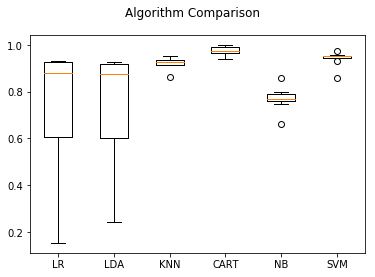

In [15]:
algorithms()

Here I will fit the machine learning model.

In [16]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc_prediction=dc.predict(x_test)

Now, the prediction process begins.

In [17]:
features=x_test.reset_index()
features=features[['satisfaction_level','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
actual=(list(y_test))
prediction=(list(dc_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)
output=features

In [18]:
print(actual)

[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 

In [19]:
print(prediction)

[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [20]:
final=features[['actual','prediction']]

In [21]:
print(final)

      actual  prediction
0          0           0
1          1           1
2          0           0
3          0           0
4          1           1
5          0           0
6          0           0
7          1           1
8          1           1
9          0           0
10         0           0
11         0           0
12         1           1
13         0           0
14         0           0
15         0           0
16         0           0
17         1           1
18         0           0
19         0           0
20         1           1
21         0           0
22         0           0
23         0           0
24         0           0
25         0           0
26         0           0
27         0           0
28         1           1
29         0           1
...      ...         ...
5970       0           0
5971       1           1
5972       0           0
5973       0           0
5974       0           0
5975       1           1
5976       0           0
5977       0           0


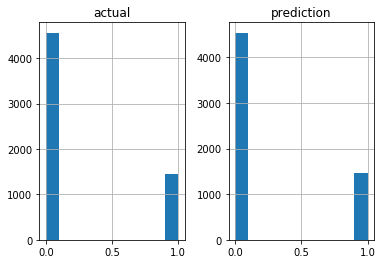

In [23]:
final.hist()
plt.show()